In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
iris_df=pd.read_excel('/content/iris .xls')
iris_df

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


2. Do the necessary pre-processing steps


In [5]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
iris_df.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
iris_df.shape[0]

150

In [9]:
#copying and saving the dataset to df1 for future reference
df1 = iris_df.copy()
df1


,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


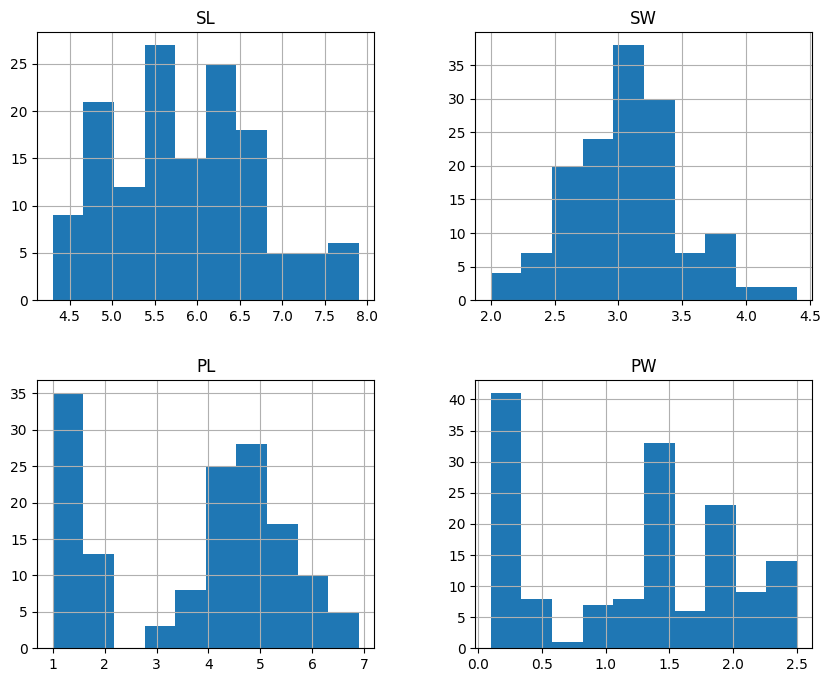

In [10]:
# to get the distribution of data in the numerical columns
graph = iris_df.select_dtypes(include='float64')
graph.hist(figsize=(10,8));

In [11]:
#checking for null values
iris_df.isnull().sum()


SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

For numerical variables: imputation using mean or median For categorical variables: imputation using mode

In [12]:
#Handling missing values
for i in ['SL','SW','PL']:
  iris_df[i]=iris_df[i].fillna(iris_df[i].median())

In [13]:
#checking whether all null values has been handled
iris_df.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [16]:
iris_df['Classification'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

In [17]:
 #Encoding  'Classification' column

import sklearn.preprocessing as sk
x_le = sk.LabelEncoder()
iris_df['Classification'] = x_le.fit_transform(iris_df['Classification'])

<Axes: >

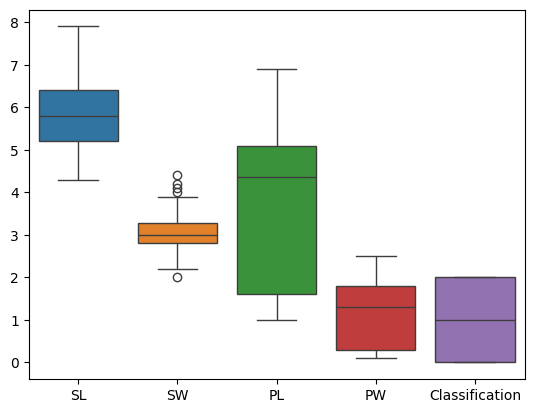

In [18]:
# finding outliers
sns.boxplot(iris_df)

In [20]:
#handling outliers for SW
Q1=np.percentile(iris_df['SW'],25,method='midpoint')
Q2=np.percentile(iris_df['SW'],50,method='midpoint')
Q3=np.percentile(iris_df['SW'],75,method='midpoint')

print('Q1 is  ',Q1)
print('Q2 is  ', Q2)
print('Q3 is  ', Q3)

IQR = Q3-Q1
print('IQR :', IQR)

lower_lim = Q1-1.5*IQR
Up_lim = Q3+1.5*IQR

print('lower whisker is ',lower_lim)
print('upper whisker is ',Up_lim)

outlier=[]
for x in iris_df['SW']:
  if( (x < lower_lim) or (x > Up_lim)):
    outlier.append(x)
print('Outliers of SW ', outlier)

Q1 is   2.8
Q2 is   3.0
Q3 is   3.25
IQR : 0.4500000000000002
lower whisker is  2.1249999999999996
upper whisker is  3.9250000000000003
Outliers of SW  [4.0, 4.4, 4.1, 4.2, 2.0]


In [21]:
# Clipping the outliers
iris_df['SW']=iris_df['SW'].clip(lower=lower_lim, upper=Up_lim)
outlier=[]
for x in iris_df['SW']:
  if( (x < lower_lim) or (x > Up_lim)):
    outlier.append(x)
print(outlier)

[]


<Axes: >

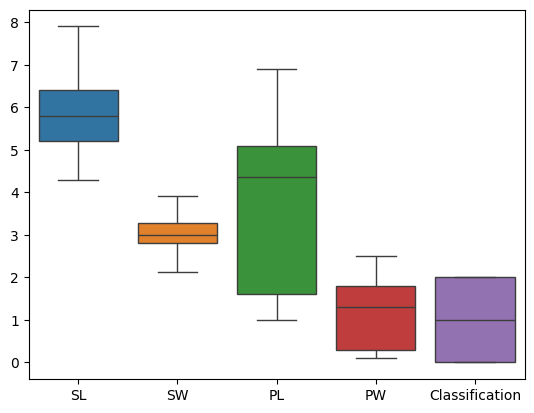

In [22]:
sns.boxplot(iris_df)

<Axes: >

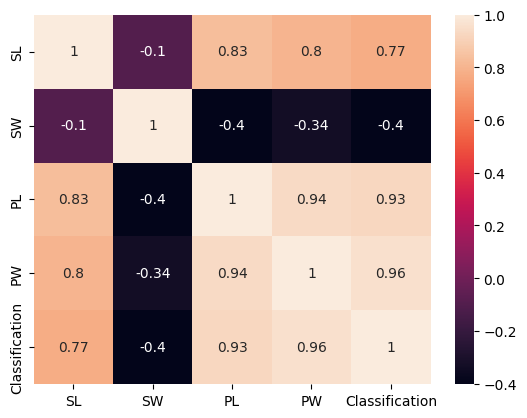

In [23]:
#Checking correlation
sns.heatmap(iris_df.corr(), annot = True)

In [24]:
#dropping unwanted columns
iris_df.drop(['PL'], axis = 1, inplace = True)
iris_df.drop(['SL'], axis = 1, inplace = True)


<Axes: >

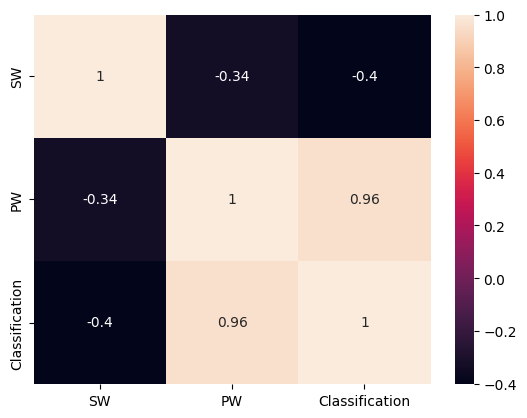

In [25]:
#after dropping the columns
sns.heatmap(iris_df.corr(), annot = True)

In [28]:
#seprating feautures and target variable
x = iris_df.drop(['Classification'], axis = 1)
y = iris_df['Classification']

In [29]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [47]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
# Importing necessary classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score


In [48]:
# Initialize classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

In [55]:
# Train and evaluate each classifier
from sklearn.metrics import accuracy_score , precision_score, recall_score, f1_score,confusion_matrix


In [56]:
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1}

In [57]:
for name, scores in results.items():
    print(f"{name}:")
    print(f"  Accuracy: {scores['Accuracy']:.4f}")
    print(f"  Precision: {scores['Precision']:.4f}")
    print(f"  Recall: {scores['Recall']:.4f}")
    print(f"  F1-score: {scores['F1-score']:.4f}")
    print()

Logistic Regression:
  Accuracy: 0.9667
  Precision: 0.9694
  Recall: 0.9667
  F1-score: 0.9664

KNN:
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-score: 1.0000

Decision Tree:
  Accuracy: 0.9667
  Precision: 0.9694
  Recall: 0.9667
  F1-score: 0.9664

Random Forest:
  Accuracy: 0.9667
  Precision: 0.9694
  Recall: 0.9667
  F1-score: 0.9664

SVM:
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-score: 1.0000



**Conclusion**
Both K-Nearest Neighbors (KNN) and Support Vector Machine (SVM) classifiers have achieved the highest accuracy score of 1.0000, indicating perfect classification performance on the test data. Therefore, either KNN or SVM can be considered the best model for this particular dataset based on the evaluation metric of accuracy.*italicized text* *italicized text*